In [1]:
import sys
import os

# Get the current working directory
current_dir = os.getcwd()

# Add the project root directory to the Python path
project_root = os.path.abspath(os.path.join(current_dir, '..'))
sys.path.insert(0, project_root)

# Print the project root to verify
print(f"Project root: {project_root}")

Project root: D:\GitHub\price-move-predictor-with-news-sentiment-week1


In [3]:
from src.financial_news.data_load import DataLoad
from src.financial_news.analysis import Analysis
from src.financial_news.visualization import Visualization

# Initialize classes
data_loader = DataLoad()
analyzer = Analysis()
visualizer = Visualization()

In [4]:
# Load dataset (adjust the path as needed)
data = data_loader.load_dataset('../data/raw_analyst_ratings.csv')

In [5]:
# --- Descriptive Statistics ---
data_loader.display_dataset_overview(data)  


--- Dataset Overview ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407328 entries, 0 to 1407327
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   Unnamed: 0  1407328 non-null  int64 
 1   headline    1407328 non-null  object
 2   url         1407328 non-null  object
 3   publisher   1407328 non-null  object
 4   date        1407328 non-null  object
 5   stock       1407328 non-null  object
dtypes: int64(1), object(5)
memory usage: 64.4+ MB
None

--- Descriptive Stats ---
          Unnamed: 0                 headline  \
count   1.407328e+06                  1407328   
unique           NaN                   845770   
top              NaN  Benzinga's Top Upgrades   
freq             NaN                     5449   
mean    7.072454e+05                      NaN   
std     4.081009e+05                      NaN   
min     0.000000e+00                      NaN   
25%     3.538128e+05                      NaN   
50

In [6]:
# --- Headline Length Analysis ---
data_loader.analyze_headline_length(data)


--- Headline Length Stats ---
count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64


,Unnamed: 0,headline,url,publisher,date,stock,headline_length
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A,39
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A,42
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A,29
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A,44
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A,87
...,...,...,...,...,...,...,...
1407323,1413844,Top Narrow Based Indexes For August 29,https://www.benzinga.com/news/11/08/1888782/to...,Monica Gerson,2011-08-29 00:00:00,ZX,38
1407324,1413845,Recap: Wednesday's Top Percentage Gainers and ...,https://www.benzinga.com/news/earnings/11/06/1...,Benjamin Lee,2011-06-22 00:00:00,ZX,52
1407325,1413846,UPDATE: Oppenheimer Color on China Zenix Auto ...,https://www.benzinga.com/analyst-ratings/analy...,BenzingaStaffL,2011-06-21 00:00:00,ZX,56
1407326,1413847,Oppenheimer Initiates China Zenix At Outperfor...,https://www.benzinga.com/analyst-ratings/price...,Joe Young,2011-06-21 00:00:00,ZX,54


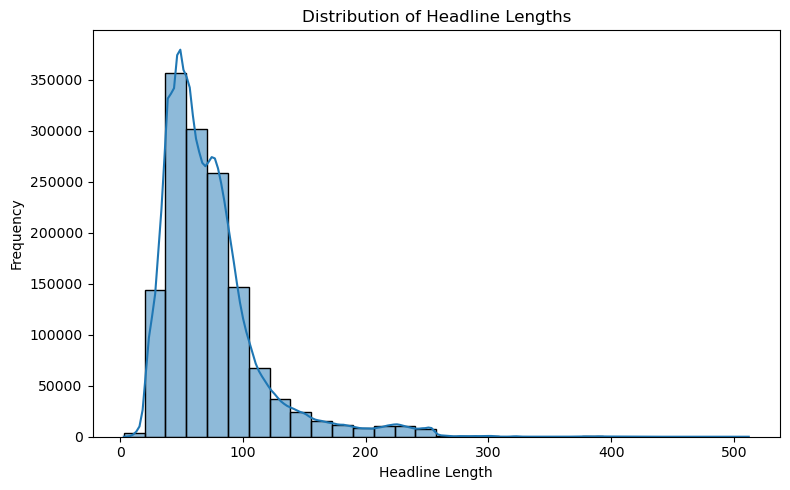

In [7]:
# Plot headline length distribution
visualizer.plot_headline_length_distribution(data)


--- Top 10 Publishers ---
publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Name: count, dtype: int64


D:\GitHub\price-move-predictor-with-news-sentiment-week1\src\financial_news\visualization.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_publishers.values, y=top_publishers.index, palette='viridis')


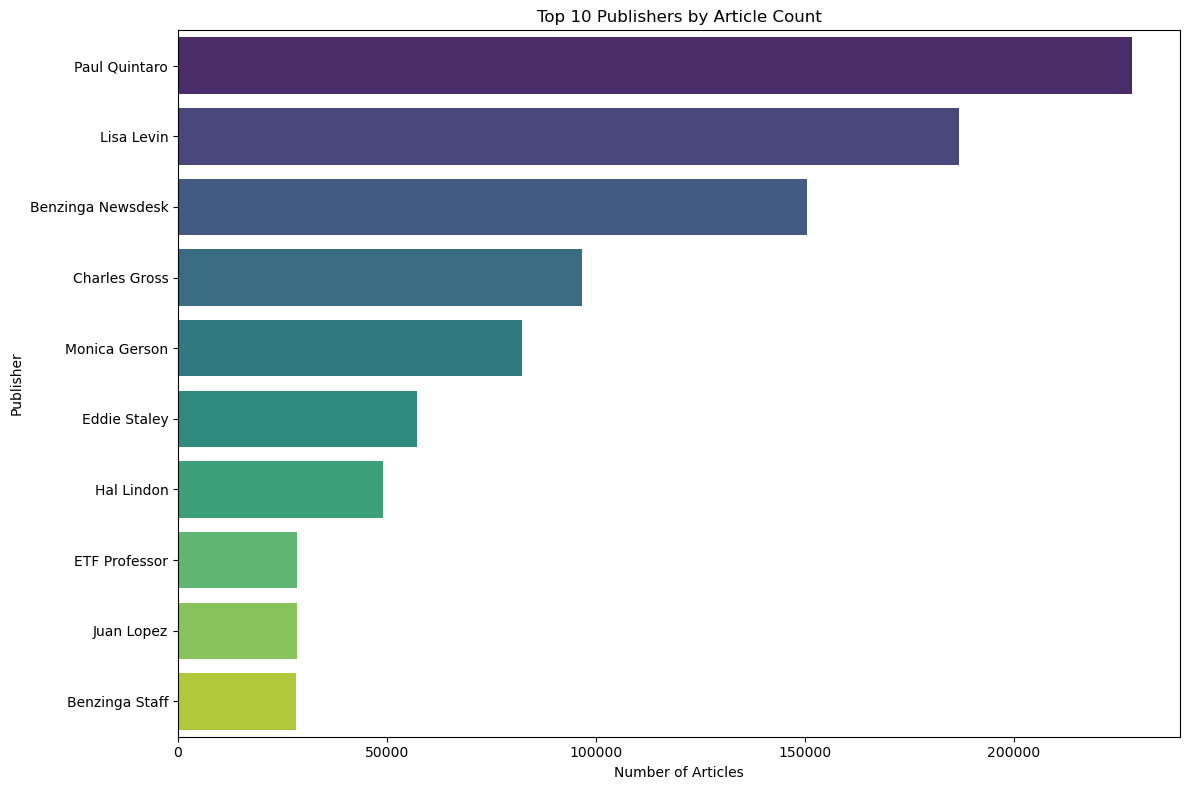

In [8]:
# --- Publisher Analysis ---
publisher_counts = analyzer.analyze_publisher_frequency(data, top_n=10)
visualizer.plot_publisher_frequency(data, top_n=10)


--- Email Publishers ---
Number of email publishers: 8088
Unique email publishers: 18

Sample email publishers:
['vishwanath@benzinga.com', 'vishwanath@benzinga.com', 'vishwanath@benzinga.com', 'vishwanath@benzinga.com', 'vishwanath@benzinga.com', 'luke@benzinga.com', 'luke@benzinga.com', 'luke@benzinga.com', 'luke@benzinga.com', 'vivek.proactive@gmail.com']

--- Email Domains ---
Total domains: 8088
Unique domains: 8

--- Top 10 Organizational Email Domains ---
publisher
benzinga.com              7937
andyswan.com                 5
investdiva.com               2
tothetick.com                2
eosdetroit.io                1
forextraininggroup.com       1
stockmetrix.net              1
Name: count, dtype: int64


D:\GitHub\price-move-predictor-with-news-sentiment-week1\src\financial_news\visualization.py:93: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_domains.values, y=top_domains.index, palette='coolwarm')


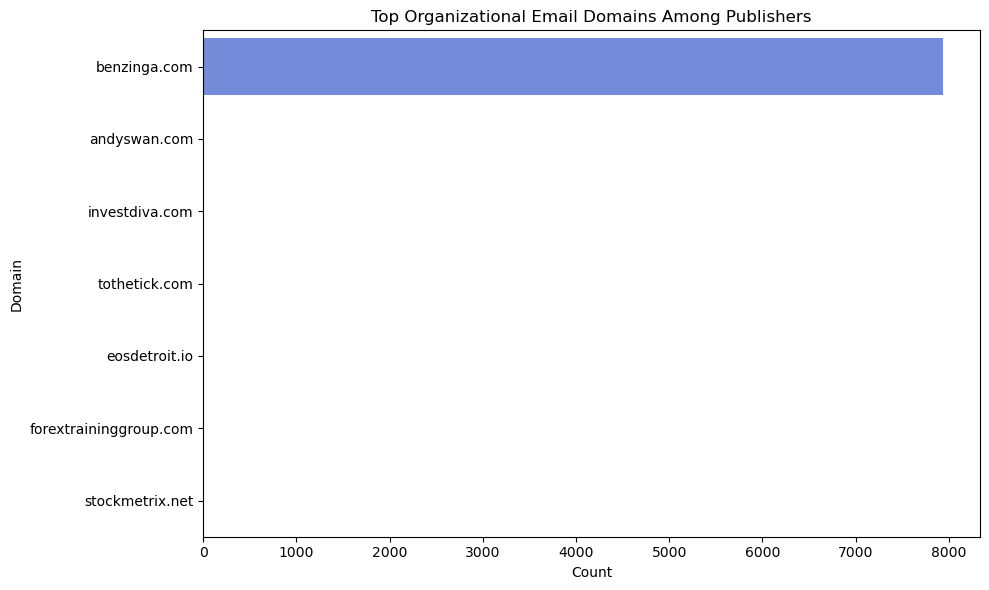

In [10]:
# --- Email Publisher Analysis ---
email_publishers = analyzer.extract_email_publishers(data)
email_domains = analyzer.extract_email_domains(email_publishers)
org_domain_counts = analyzer.get_organizational_domains(email_domains, top_n=10)
visualizer.plot_organizational_domains(org_domain_counts, top_n=10)


--- Daily Publication Patterns ---
Total days with publications: 3955
Date range: 2009-02-14 to 2020-06-11
Average articles per day: 355.84
Median articles per day: 407.00
Max articles in a day: 2739
Min articles in a day: 1

Top 10 busiest days:
publish_day
2020-03-12    2739
2020-02-28    1620
2020-03-19    1595
2020-02-27    1567
2020-03-06    1428
2020-05-07    1398
2020-03-23    1391
2020-04-29    1389
2020-03-11    1384
2020-04-30    1327
dtype: int64


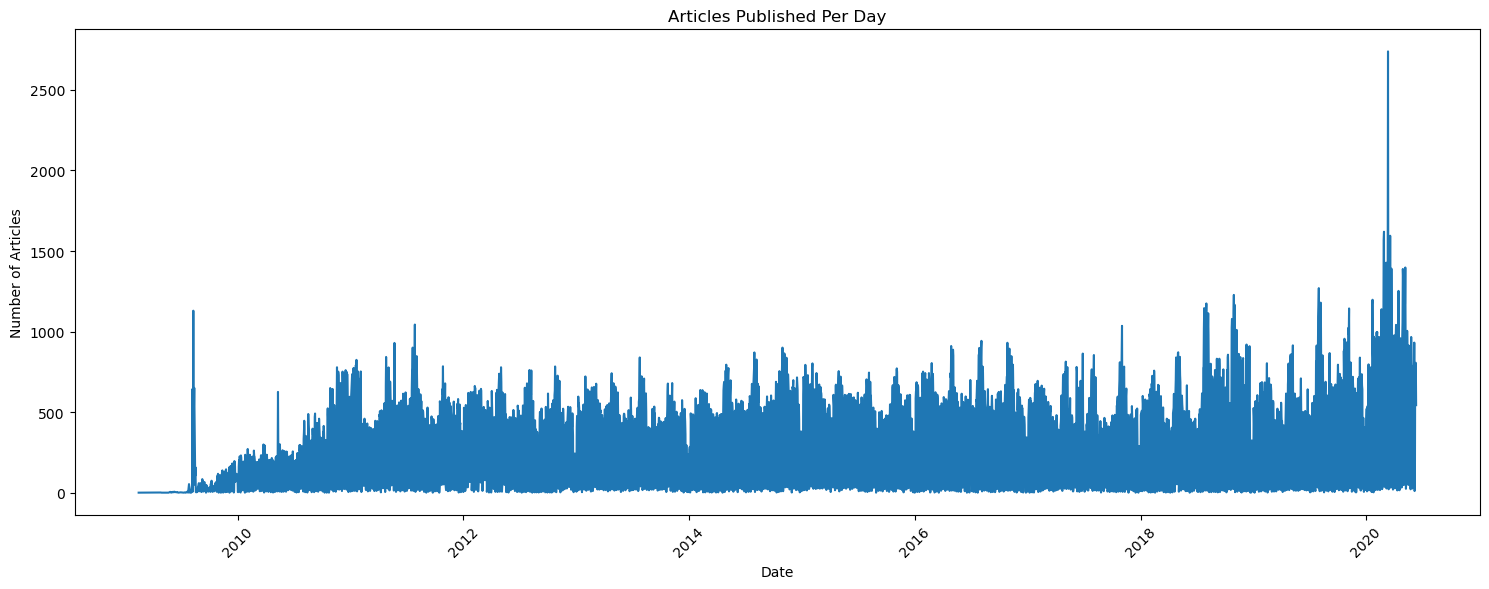

In [11]:
# --- Time Series Analysis ---
data_loader.prepare_time_features(data)
daily_counts = analyzer.analyze_daily_patterns(data)
visualizer.plot_daily_publication_count(data)


--- Hourly Publication Patterns ---
Articles published by hour:
hour
0     1351472
1          82
2          48
3          27
4          67
5          14
6          57
7          93
8        1469
9        1829
10       2476
11       5033
12       5527
13       5965
14       7669
15       5701
16       5732
17       2710
18       2075
19       1612
20       3939
21       2800
22        704
23        227
Name: count, dtype: int64

Business hours (9 AM - 5 PM): 39932 articles
After hours: 1367396 articles
Business hours percentage: 2.8%


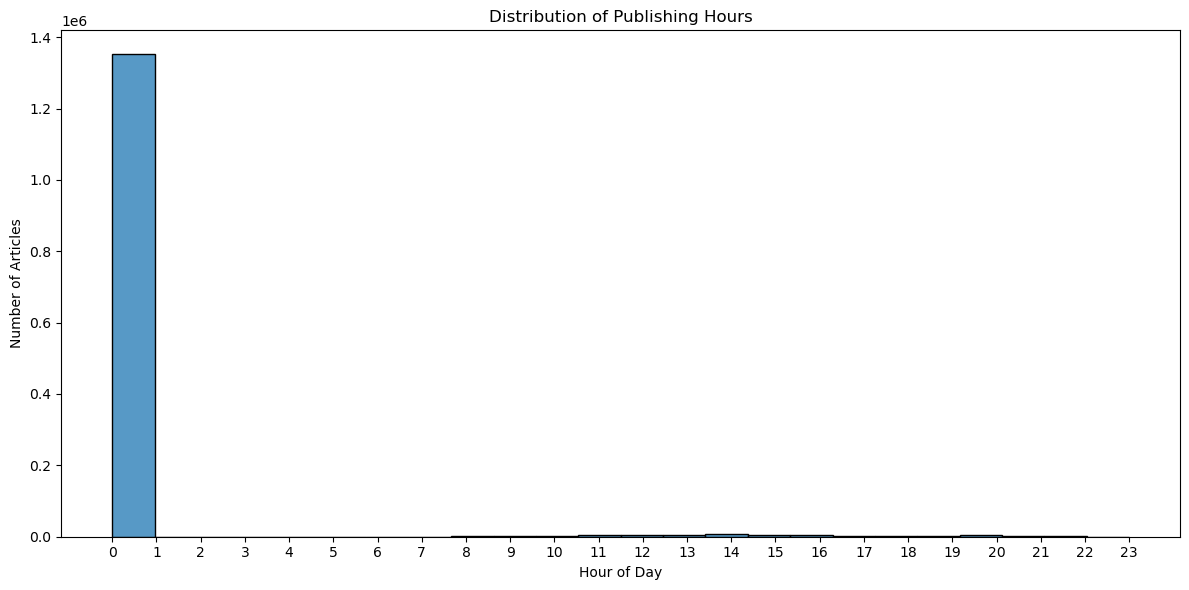

In [12]:
# Hour of publication
hourly_counts = analyzer.analyze_hourly_patterns(data)
visualizer.plot_hourly_publication_pattern(data)


--- Top 30 Keywords (n-grams (2, 3)) ---
52 week               51006
price target          47274
stocks moving         40044
mid day               37324
market update         33101
earnings scheduled    32055
initiates coverage    28993
pre market            28393
raises pt             27213
companies trading     23170
trading higher        22700
market session        22428
vs est                21843
adj eps               21708
pre market session    21665
benzinga upgrades     21108
q1 eps                20704
q2 eps                20258
q3 eps                20043
stocks hit            20030
trading lower         20018
hit 52                19973
hit 52 week           19971
stocks hit 52         19903
q4 eps                19849
new 52                19494
new 52 week           19255
morning market        18918
option alert          18226
week highs            18023
dtype: int64


D:\GitHub\price-move-predictor-with-news-sentiment-week1\src\financial_news\visualization.py:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_keywords.values, y=top_keywords.index, palette='coolwarm')


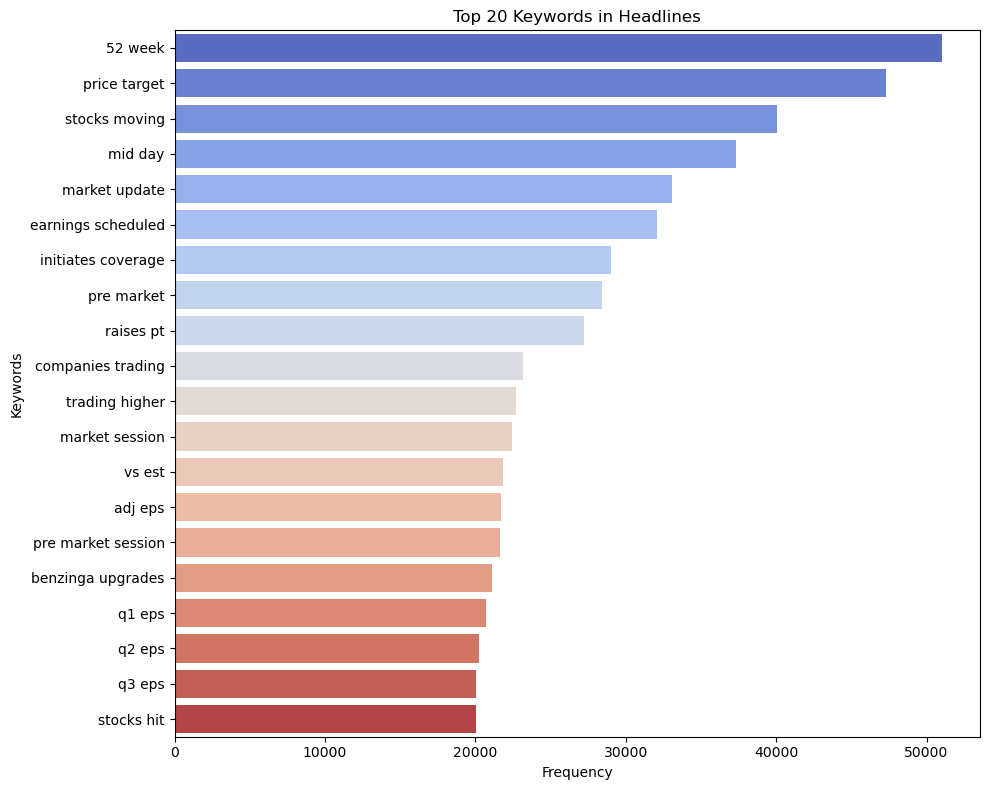

In [14]:

# --- Keyword Frequency Analysis ---
word_freq = analyzer.analyze_keyword_frequency(data, ngram_range=(2, 3), max_features=30)
visualizer.display_keyword_frequency_chart(word_freq, top_n=20)